#### Urdu Caption Generation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import re
import numpy as np
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
from nltk.translate.bleu_score import sentence_bleu
import cv2

### Loading Data

In [3]:
# Loading Images 
image_path = r"/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images"

In [6]:
jpgs = os.listdir(image_path)
print("Total Images in Dataset = {}".format(len(jpgs)))

Total Images in Dataset = 24283


In [7]:
BASE_FOLDER = r'C:\path_to_folder'
BASE_NAME = r'filename_DATA.txt'
fname = os.path.join(BASE_FOLDER, BASE_NAME)

In [8]:
# Loading Captions
caption_file_path=r"/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/man_data_final.json"
with open(caption_file_path, 'r') as j:
    data = json.load(j)  

In [9]:
# Getting Captions and image names from json file
train_captions = []
img_name_vector = []
for i in range(0,700):
    for j in range(5):
        img_name_vector.append(data['images'][i]['filename'])
        train_captions.append('<start> '+str((data['images'][i]['sentences'][j]['raw']))+' <end>')


In [10]:
img_name_vector

['1007129816_e794419615.jpg',
 '1007129816_e794419615.jpg',
 '1007129816_e794419615.jpg',
 '1007129816_e794419615.jpg',
 '1007129816_e794419615.jpg',
 '1015118661_980735411b.jpg',
 '1015118661_980735411b.jpg',
 '1015118661_980735411b.jpg',
 '1015118661_980735411b.jpg',
 '1015118661_980735411b.jpg',
 '101669240_b2d3e7f17b.jpg',
 '101669240_b2d3e7f17b.jpg',
 '101669240_b2d3e7f17b.jpg',
 '101669240_b2d3e7f17b.jpg',
 '101669240_b2d3e7f17b.jpg',
 '1016887272_03199f49c4.jpg',
 '1016887272_03199f49c4.jpg',
 '1016887272_03199f49c4.jpg',
 '1016887272_03199f49c4.jpg',
 '1016887272_03199f49c4.jpg',
 '1022454428_b6b660a67b.jpg',
 '1022454428_b6b660a67b.jpg',
 '1022454428_b6b660a67b.jpg',
 '1022454428_b6b660a67b.jpg',
 '1022454428_b6b660a67b.jpg',
 '102351840_323e3de834.jpg',
 '102351840_323e3de834.jpg',
 '102351840_323e3de834.jpg',
 '102351840_323e3de834.jpg',
 '102351840_323e3de834.jpg',
 '102455176_5f8ead62d5.jpg',
 '102455176_5f8ead62d5.jpg',
 '102455176_5f8ead62d5.jpg',
 '102455176_5f8ead62d5.

In [11]:
# Displaying some captions
train_captions[:10] 

['<start> ایک شخص بینچ پر لیٹا ہے جبکہ اس کا کتا اس کے پاس بیٹھا ہے <end>',
 '<start> ایک شخص اس بینچ پر لیٹتا ہے جس پر ایک سفید کتا بھی بندھا ہوا ہے <end>',
 '<start> ایک آدمی باہر بینچ پر سو رہا ہے جس کے پاس ایک سفید اور سیاہ کتے تھے <end>',
 '<start> ایک قمیض کے بغیر شخص اپنے کتے کے ساتھ پارک بینچ پر پڑا ہے <end>',
 '<start> ایک آدمی بینچ پر زمین پر بیٹھے کتے کا پٹا پکڑے ہوے لیٹا ھوا ہے <end>',
 '<start> ایک لڑکا شہر میں پتھریلی دیوار کے سامنے مسکرا رہا ہے <end>',
 '<start> ایک چھوٹا لڑکا سڑک پر کھڑا ہے جبکہ ایک آدمی پتھر کی دیوار پر کام کر رہا ہے <end>',
 '<start> ایک نوجوان لڑکا سڑک کے پار دوڑ رہا ہے <end>',
 '<start> ایک چھوٹا بچہ ایک پتھر کی ہموار سڑک پر چل رہا ہے جبکہ اس کے پیچھے دھاتی کھمبا اور ایک آدمی ہے <end>',
 '<start> سفید قمیض اور نیلی جینز پہنے ہوئے چٹان کی دیوار کے سامنے کھڑا لڑکا جسکے پیچھے ایک آدمی ہے <end>']

In [12]:
import pandas as pd
df = pd.DataFrame((img_name_vector,train_captions)).T
df.columns = ['Images','Captions']
df

,Images,Captions
0,1007129816_e794419615.jpg,<start> ایک شخص بینچ پر لیٹا ہے جبکہ اس کا کتا...
1,1007129816_e794419615.jpg,<start> ایک شخص اس بینچ پر لیٹتا ہے جس پر ایک ...
2,1007129816_e794419615.jpg,<start> ایک آدمی باہر بینچ پر سو رہا ہے جس کے ...
3,1007129816_e794419615.jpg,<start> ایک قمیض کے بغیر شخص اپنے کتے کے ساتھ ...
4,1007129816_e794419615.jpg,<start> ایک آدمی بینچ پر زمین پر بیٹھے کتے کا ...
...,...,...
3495,3640743904_d14eea0a0b.jpg,<start> ایک لڑکا اپنے چار کتوں کے ساتھ چل رہا ...
3496,3640743904_d14eea0a0b.jpg,<start> ایک شخص پارکنگ میں اپنے چار کتوں کے سا...
3497,3640743904_d14eea0a0b.jpg,<start> ایک عورت چار کتوں کے ساتھ چل رہی ہے <end>
3498,3640743904_d14eea0a0b.jpg,<start> آدمی چار کتے چلا رہا ہے <end>


### Loading CNN based feature extraction model

In [13]:
# Loading ResNet-101-V2 model
# Removing fully connected layers
image_model = tf.keras.applications.ResNet101V2(include_top=False,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

171317808/171317808 [==============================] - 8s 0us/step


### Preprocessing on data

In [14]:
# loading and preprocessing images
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.resnet_v2.preprocess_input(img)
    return img, image_path

In [15]:
image_path

'/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images'

In [16]:
all_img_name_vector = []

for annot in img_name_vector:
    full_image_path = os.path.join(image_path, annot)

    all_img_name_vector.append(full_image_path)
all_img_name_vector[:10]

['/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images/1007129816_e794419615.jpg',
 '/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images/1007129816_e794419615.jpg',
 '/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images/1007129816_e794419615.jpg',
 '/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images/1007129816_e794419615.jpg',
 '/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images/1007129816_e794419615.jpg',
 '/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images/1015118661_980735411b.jpg',
 '/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images/1015118661_980735411b.jpg',
 '/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images/1015118661_980735411b.jpg',
 '/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images/1015118661_980735411b.jpg',
 '/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images/1015118661_980735411b.jpg']

In [17]:
# Compiling Dataset
encode_train = sorted(set(all_img_name_vector))
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)

image_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [18]:
for img, path in image_dataset:
  batch_features = image_features_extract_model(img)
  batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))

  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())
    print(path_of_feature)
    

/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images/1007129816_e794419615.jpg
/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images/1015118661_980735411b.jpg
/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images/101669240_b2d3e7f17b.jpg
/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images/1016887272_03199f49c4.jpg
/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images/1022454428_b6b660a67b.jpg
/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images/102351840_323e3de834.jpg
/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images/102455176_5f8ead62d5.jpg
/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images/1028205764_7e8df9a2ea.jpg
/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images/103195344_5d2dc613a3.jpg
/content/drive/MyDrive/Thesis/Captioning/Urdu Caption Dataset/Images/1032460886_4a598ed535.jpg
/content/drive/MyDrive/Thesis/Captioning/Urdu Caption 

In [19]:
# Find the maximum length of caption in dataset
def calc_max_length(tensor):
    return max(len(t) for t in tensor)

In [20]:
# Choose the top k words from the vocabulary
top_k = 5000
# Tokeninzation
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                  oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(train_captions)
# Converting into to sequences
train_seqs = tokenizer.texts_to_sequences(train_captions)
print("Before: ",train_captions[0])
print("After: ",train_seqs[0])

Before:  <start> ایک شخص بینچ پر لیٹا ہے جبکہ اس کا کتا اس کے پاس بیٹھا ہے <end>
After:  [3, 2, 11, 141, 8, 262, 5, 61, 46, 24, 104, 46, 6, 54, 36, 5, 4]


In [21]:
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

In [22]:
# Padding each vector to the max_length of the captions
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

In [23]:
# Calculates the max_length, which is used to store the attention weights
max_length = calc_max_length(train_seqs)

### Splitting data

In [24]:
# Splitting data into training and validaiton
img_name_train, img_name_val, cap_train, cap_val = train_test_split(all_img_name_vector,
                                                                    cap_vector,
                                                                    test_size=0.2,
                                                                    random_state=0)

In [25]:
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(2800, 2800, 700, 700)

## Model

In [26]:
BATCH_SIZE = 10
BUFFER_SIZE = 10000
embedding_dim = 256
units = 512
vocab_size = top_k + 1
num_steps = len(img_name_train) // BATCH_SIZE
features_shape = 2048
attention_features_shape = 100

In [27]:
def map_func(img_name, cap):
  img_tensor = np.load(img_name.decode('utf-8')+'.npy')
  return img_tensor, cap
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

## Bahdanau Attention

In [28]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, features, hidden):
    
    hidden_with_time_axis = tf.expand_dims(hidden, 1)
    # alignment score = tanh(X_E.W_E + H_D.W_D)
    score = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))
    # attention weights = softmax(alignment scores)
    attention_weights = tf.nn.softmax(self.V(score), axis=1)
    # context vector = attention weights * extracted features
    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

### CNN Encoder

In [29]:
# Extract image features 
class CNN_Encoder(tf.keras.Model):
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

### RNN Decoder

In [30]:
# Inputs extracted features 
# Pass these features and previous hidden layer to attention mechnism
# Attention mechanism returns context vector and attention weights
# after concatenating context vector with current input of decoder
# GRU then predict next wrod
class RNN_Decoder(tf.keras.Model):
  def __init__(self, embedding_dim, units, vocab_size):
    super(RNN_Decoder, self).__init__()
    self.units = units

    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc1 = tf.keras.layers.Dense(self.units)
    self.fc2 = tf.keras.layers.Dense(vocab_size)

    self.attention = BahdanauAttention(self.units)

  def call(self, x, features, hidden):
    
    context_vector, attention_weights = self.attention(features, hidden)
    x = self.embedding(x)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
    output, state = self.gru(x)
    x = self.fc1(output)
    x = tf.reshape(x, (-1, x.shape[2]))
    x = self.fc2(x)

    return x, state, attention_weights

  def reset_state(self, batch_size):
    return tf.zeros((batch_size, self.units))

In [31]:
# initializing encoder and decoder
encoder = CNN_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim, units, vocab_size)

In [32]:
encoder

### Model Training

In [33]:
# Setting Optimizer and Loss Function
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [34]:
checkpoint_path = r"/content/drive/MyDrive/Thesis/Captioning/Urdu Model Checkpoints"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [35]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
  start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
  ckpt.restore(ckpt_manager.latest_checkpoint)

In [36]:
# Training Function
@tf.function
def train_step(img_tensor, target):
  loss = 0
  # Initiating hidden state for first time
  hidden = decoder.reset_state(batch_size=target.shape[0])
  # current input to decoder
  dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

  with tf.GradientTape() as tape:
      # Extracting features from encoder
      features = encoder(img_tensor)
      for i in range(1, target.shape[1]):
          # Passing features, previous hidden state and input to the decoder
          predictions, hidden, _ = decoder(dec_input, features, hidden)
          # calculating loss
          loss += loss_function(target[:, i], predictions)
          dec_input = tf.expand_dims(target[:, i], 1)
  total_loss = (loss / int(target.shape[1]))
  trainable_variables = encoder.trainable_variables + decoder.trainable_variables
  gradients = tape.gradient(loss, trainable_variables)
  optimizer.apply_gradients(zip(gradients, trainable_variables))
  return loss, total_loss

In [37]:
EPOCHS = 30
loss_plot = []
for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0
    # Getting current batch
    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 100 == 0:
            print ('Epoch {} Batch {} Loss {:.4f}'.format(
              epoch + 1, batch, batch_loss.numpy() / int(target.shape[1])))
    loss_plot.append(total_loss / num_steps)

    if epoch % 5 == 0:
      ckpt_manager.save()

    print ('Epoch {} Loss {:.6f}'.format(epoch + 1,
                                         total_loss/num_steps))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 12 Batch 0 Loss 0.1499
Epoch 12 Batch 100 Loss 1.0561
Epoch 12 Batch 200 Loss 1.0246
Epoch 12 Loss 0.960269
Time taken for 1 epoch 103.64441728591919 sec

Epoch 13 Batch 0 Loss 0.6037
Epoch 13 Batch 100 Loss 0.5925
Epoch 13 Batch 200 Loss 0.8971
Epoch 13 Loss 0.711434
Time taken for 1 epoch 23.15804147720337 sec

Epoch 14 Batch 0 Loss 0.5070
Epoch 14 Batch 100 Loss 0.5774
Epoch 14 Batch 200 Loss 0.6702
Epoch 14 Loss 0.585506
Time taken for 1 epoch 22.53342604637146 sec

Epoch 15 Batch 0 Loss 0.4263
Epoch 15 Batch 100 Loss 0.4939
Epoch 15 Batch 200 Loss 0.6731
Epoch 15 Loss 0.511116
Time taken for 1 epoch 22.641958236694336 sec

Epoch 16 Batch 0 Loss 0.4310
Epoch 16 Batch 100 Loss 0.4072
Epoch 16 Batch 200 Loss 0.4985
Epoch 16 Loss 0.461923
Time taken for 1 epoch 22.700833559036255 sec

Epoch 17 Batch 0 Loss 0.3357
Epoch 17 Batch 100 Loss 0.3115
Epoch 17 Batch 200 Loss 0.5363
Epoch 17 Loss 0.419680
Time taken for 1 epoch 22.341447591781616 sec

Epoch 18 Batch 0 Loss 0.3364
Epoch 1

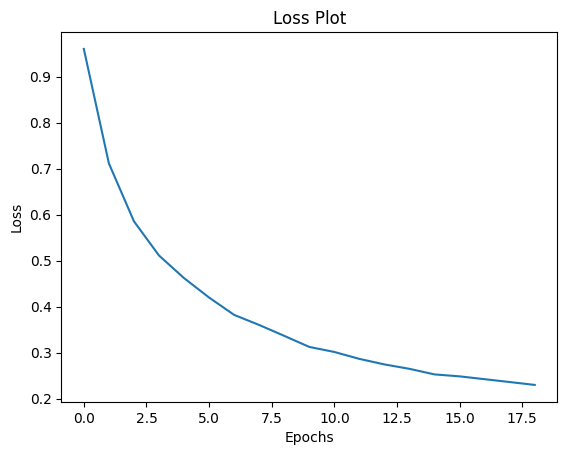

In [38]:
# Loss curve
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

In [39]:
# This function generate captions on evaluation data
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))
    hidden = decoder.reset_state(batch_size=1)
    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))
    features = encoder(img_tensor_val)
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []
    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id])
        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot
        dec_input = tf.expand_dims([predicted_id], 0)
    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

In [40]:
# This function is used to plot attentions  
def plot_attention(image, result, attention_plot):
    temp_image = np.array(Image.open(image))

    fig = plt.figure(figsize=(10, 10))

    len_result = len(result)
    for l in range(len_result):
        temp_att = np.resize(attention_plot[l], (8, 8))
        ax = fig.add_subplot(len_result//2, len_result//2, l+1)
        ax.set_title(result[l])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    plt.tight_layout()
    plt.show()

In [41]:
import cv2

In [42]:
# captions on the validation set
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
result, attention_plot = evaluate(image)
real = df.loc[rid,'Captions']
print(real)
cleaned = []
predicted = ' '.join(result)
print ('Prediction Caption:', predicted)

<start> ایک سفید آدمی جس کے بال بڑے ہیں اور داڑھی رکھے ہوئے ہوۓ ہے کے کندھے پر ایک بچہ ہے <end>
Prediction Caption: پیلے رنگ کے اوپر ہے اور ایک آدمی سرخ رنگ کی کار میں ہے جبکہ دوسرا آدمی اس کے پیچھے ہے <end>


In [43]:
bs = sentence_bleu(real, predicted)
print('BLEU Score:',bs)

BLEU Score: 1.3189641082284807e-231


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

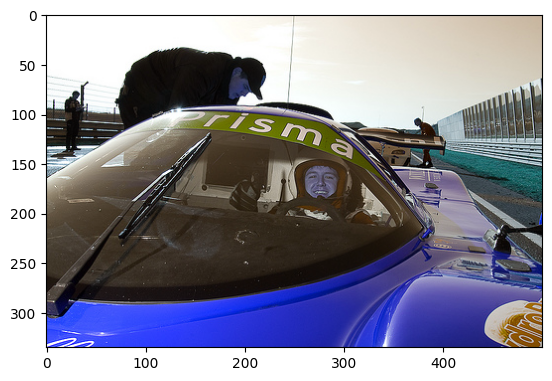

In [44]:
img = cv2.imread(image)
plt.imshow(img)

In [ ]:
score = 0
for i in range (0,len(img_name_val),5):
    image = img_name_val[i]
    result, attention_plot = evaluate(image)
    real = list(df[df['Images']==image]['Captions'])
    cleaned = []
    for i in range(len(real)):
        cleaned.append(real[i][7:-5])
    predicted = ' '.join(result)
    #score += sentence_bleu(cleaned, predicted)
#val_bleu = score/len(img_name_val)*5
#print("BLEU score on validation data: ",val_bleu)


In [ ]:
image_url = 'https://www.cycleworld.com/resizer/HUAz4Vm4lBvgXcIPjfMNVhGPIkY=/1440x0/filters:focal(794x445:804x455)/cloudfront-us-east-1.images.arcpublishing.com/octane/OUD5FNMVQNH25DNIGP57742FDE.jpg'
image_extension = image_url[-8:]
image_path = tf.keras.utils.get_file('image'+image_extension,
                                     origin=image_url)

result, attention_plot = evaluate(image_path)
print ('Prediction Caption:', ' '.join(result))
Image.open(image_path)

In [ ]:
image_url = 'https://www.urdunews.com/sites/default/files/styles/660_scale/public/2022/12/10/1644661-1354163306.jpg'
image_extension = image_url[-18:]
image_path = tf.keras.utils.get_file('image'+image_extension,
                                     origin=image_url)

result, attention_plot = evaluate(image_path)
print ('Prediction Caption:', ' '.join(result))
Image.open(image_path)

Exception: ignored

In [ ]:
image_url = 'https://i.guim.co.uk/img/media/9afa4db6845c52a535aeb3c210b5ea698894ca29/0_114_4878_2927/master/4878.jpg?width=1300&quality=45&dpr=2&s=none'
image_extension = image_url[-18:]
image_path = tf.keras.utils.get_file('image'+image_extension,
                                     origin=image_url)

result, attention_plot = evaluate(image_path)
print ('Prediction Caption:', ' '.join(result))
Image.open(image_path)

In [ ]:
checkpoint_path = r"C:\Users\Saad Munir\Effecient-Urdu-Caption-Generation-using-Attention-Mechanism-master\Codes\gdrive\My Drive\Project\Dataset\"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)